**Heart Disease Data Dictionary**

>The following are the features we'll use to predict our target variable (heart disease or no heart disease).

    *age - age in years
    *sex - (1 = male; 0 = female)
    *cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
    *trestbps - resting blood pressure (in mm Hg on admission to the hospital)
        anything above 130-140 is typically cause for concern
    *chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
    *fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
    *restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
    *thalach - maximum heart rate achieved
    *exang - exercise induced angina (1 = yes; 0 = no)
    *oldpeak - ST depression induced by exercise relative to rest
        looks at stress of heart during excercise
        unhealthy heart will stress more
    *slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
    *ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
    *thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising 
    *target - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./dataset/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(303, 14)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

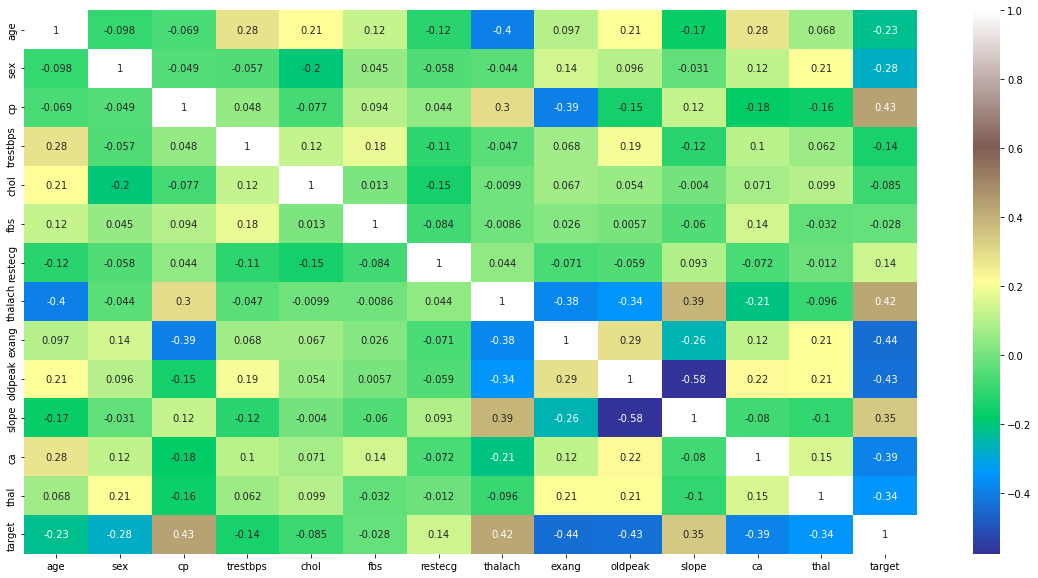

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='terrain');

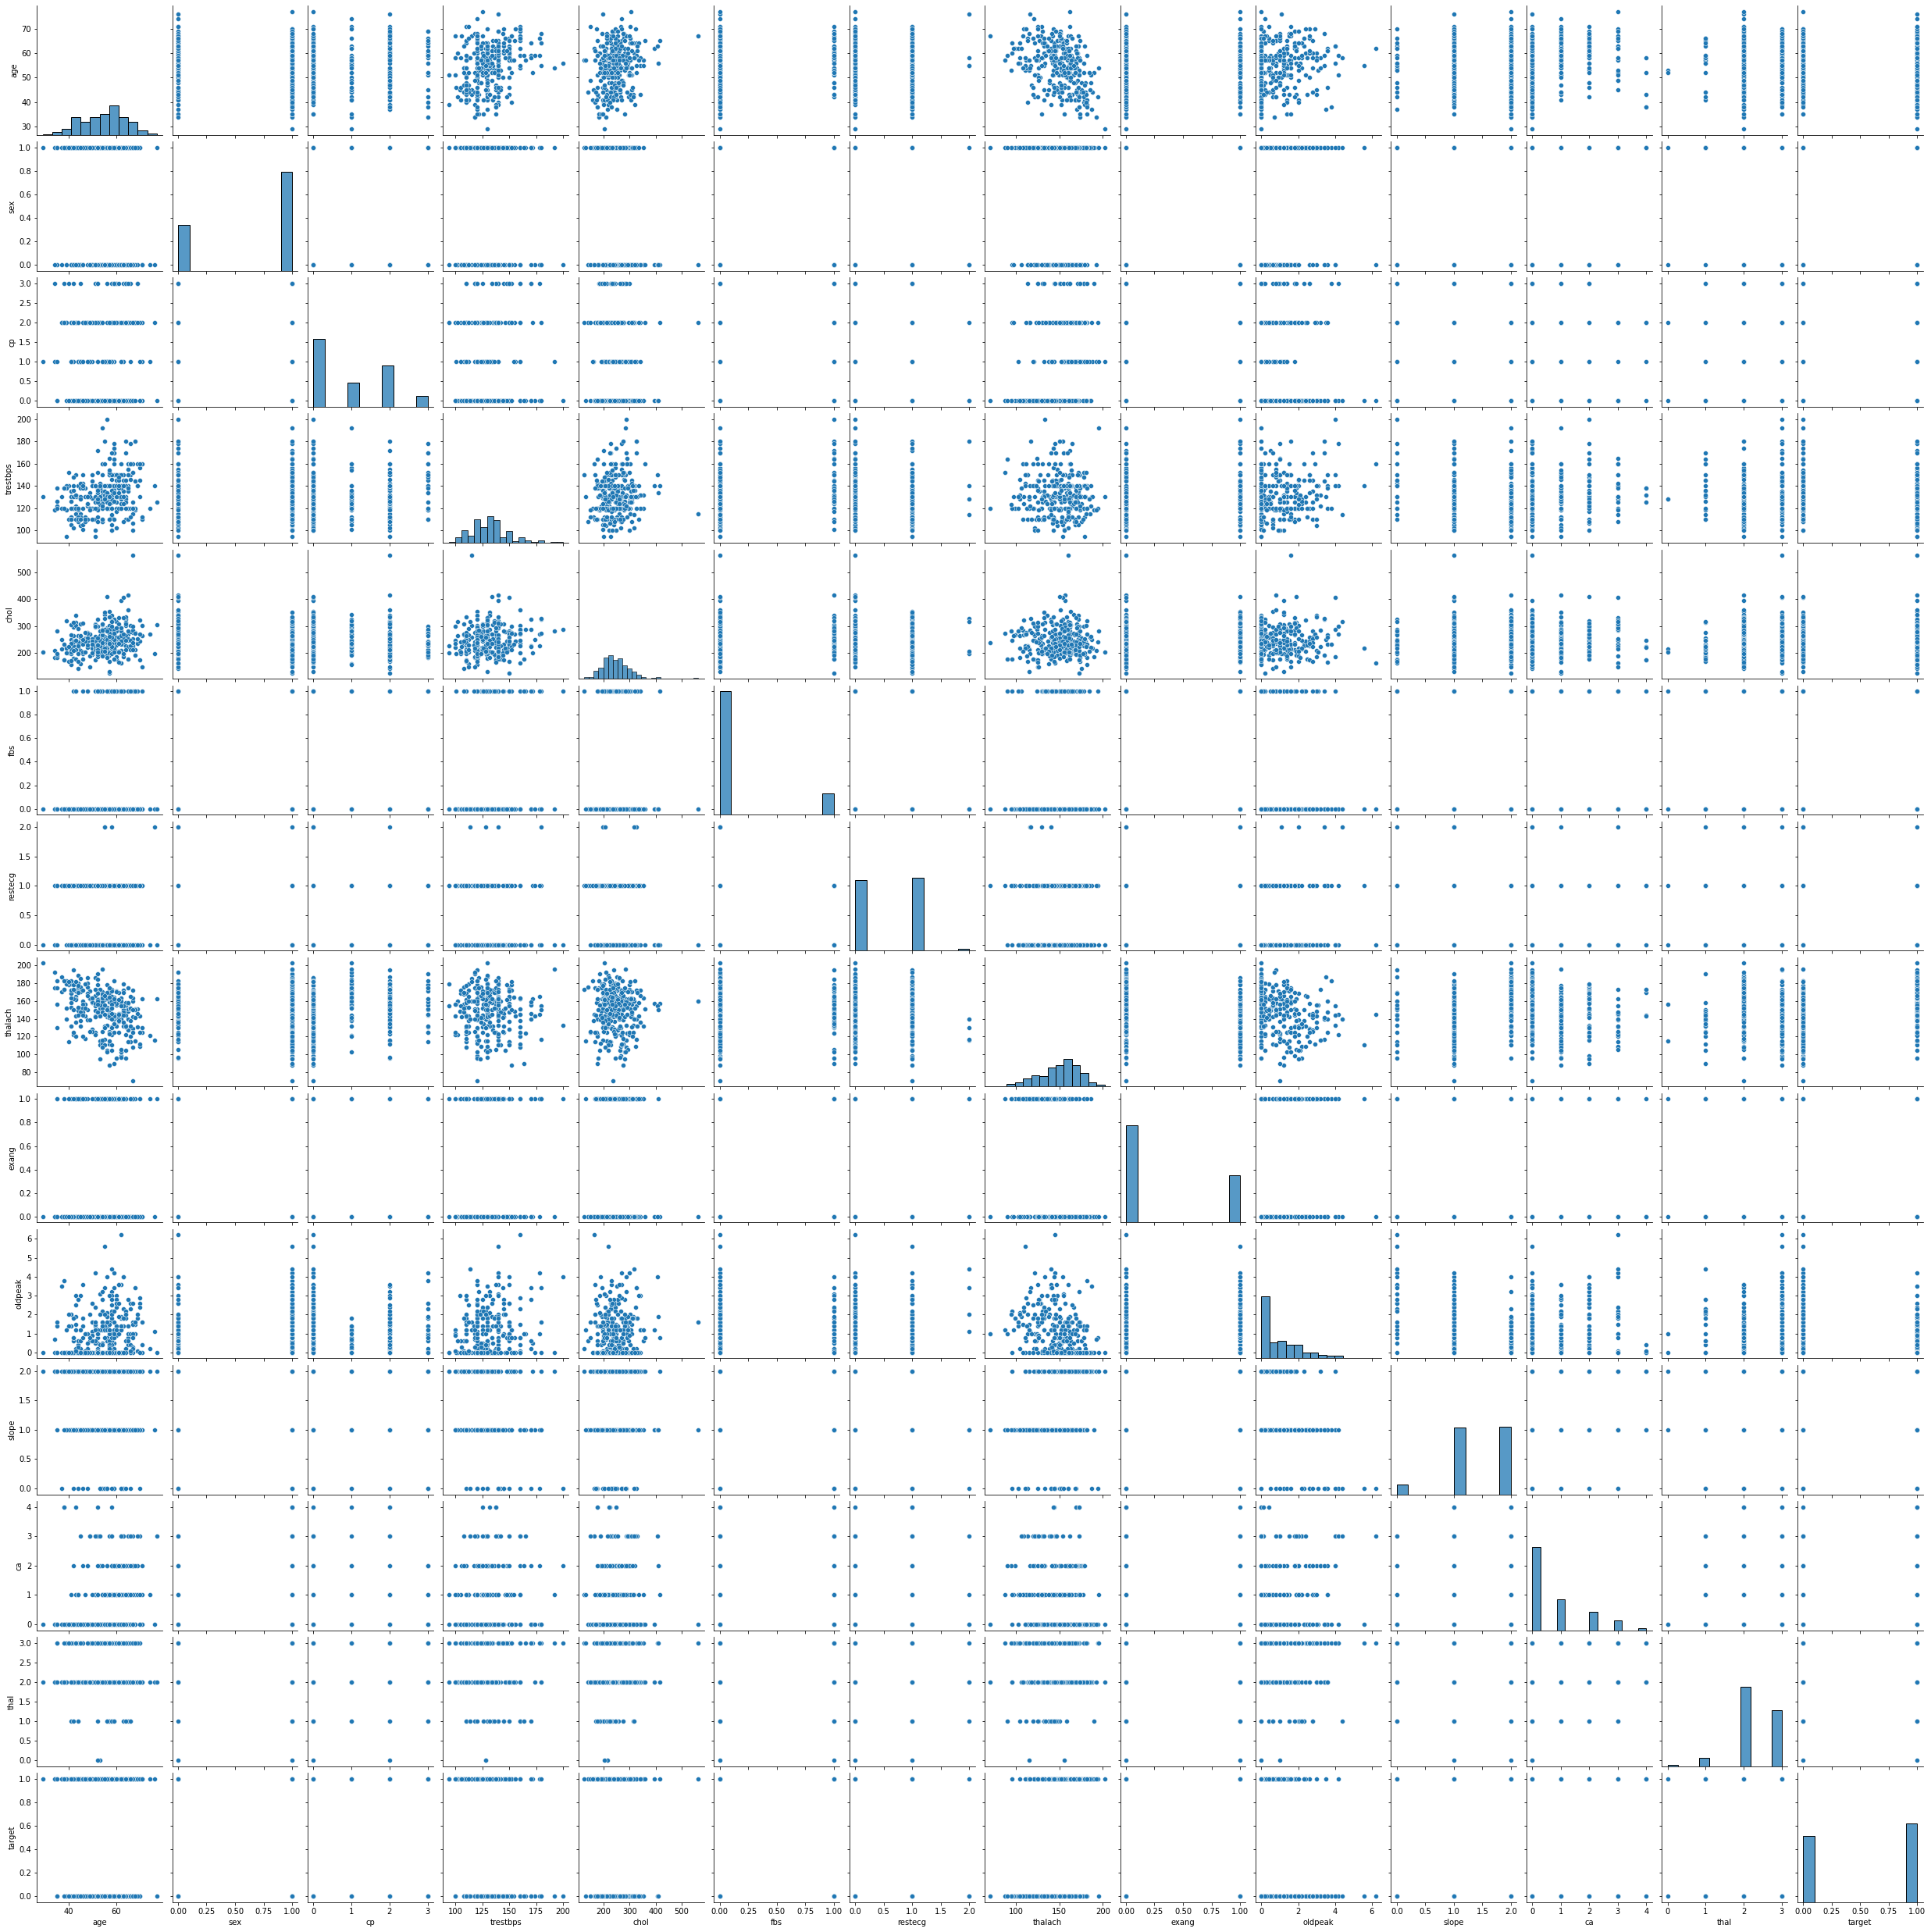

In [10]:
sns.pairplot(data=df)

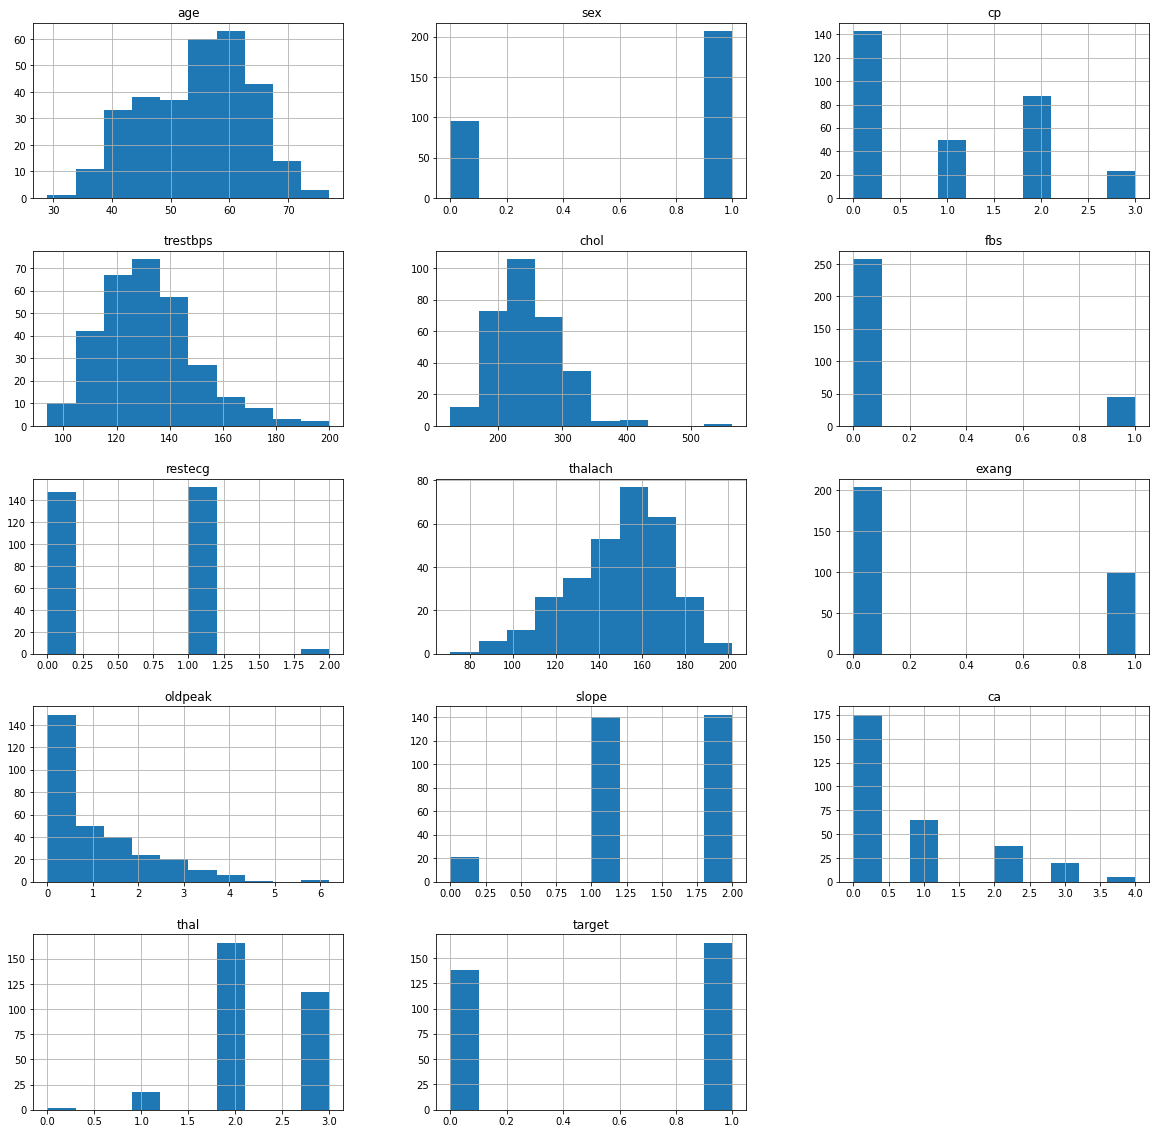

In [11]:
df.hist(figsize=(20,20),layout=(5,3));

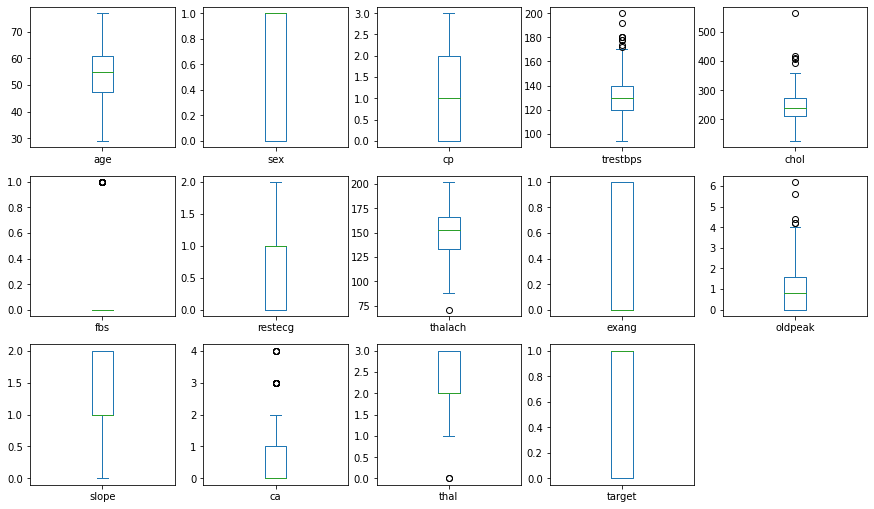

In [12]:
df.plot(kind='box', subplots=True, figsize=(15,15), layout=(5,5))
plt.show()

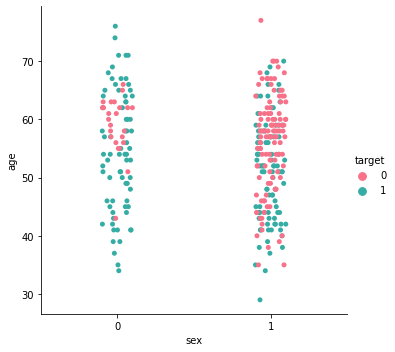

In [13]:
sns.catplot(data=df,x='sex',y='age', hue='target', palette='husl')

<AxesSubplot:xlabel='sex', ylabel='chol'>

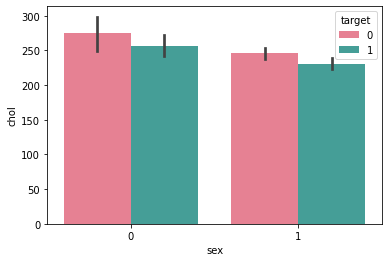

In [14]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='husl')

> 1-> Male, 0->Female


In [15]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

> '165' patients have heart disease(1)
> '138' patients do not have heart disease(0)


In [16]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

**Here 1 means male and 0 denotes female. we observe female having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.**

<AxesSubplot:xlabel='sex', ylabel='count'>

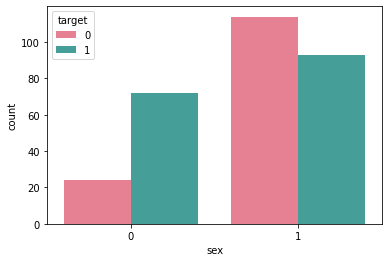

In [17]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')

<AxesSubplot:xlabel='target', ylabel='count'>

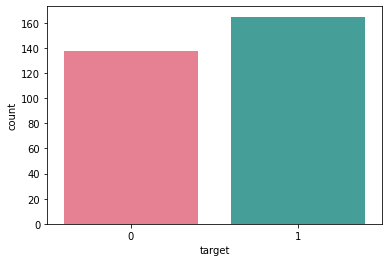

In [18]:
sns.countplot(x='target',palette='husl', data=df)

**'ca' number of major vessels (0-3) colored by fluoroscopy ca has a negative corelation with the target i.e when ca will increase we witness a drop in heart diseases and vice versa.**


In [19]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

<AxesSubplot:xlabel='ca', ylabel='count'>

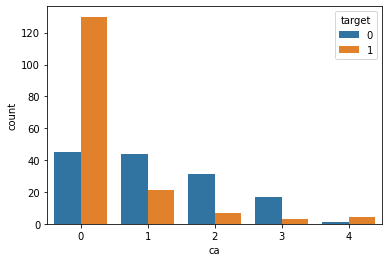

In [20]:
sns.countplot(x='ca',hue='target',data=df)

<AxesSubplot:xlabel='thal', ylabel='count'>

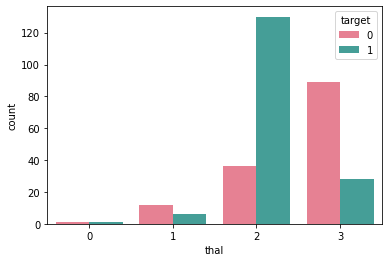

In [21]:
sns.countplot(x='thal',data=df, hue='target', palette='husl' )

**thal3 = normal; 6 = fixed defect; 7 = reversable defect**

<AxesSubplot:xlabel='thal', ylabel='count'>

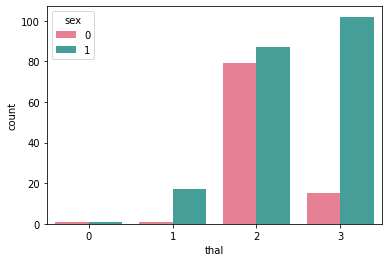

In [22]:
sns.countplot(x='thal',data=df, hue='sex', palette='husl')

In [23]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

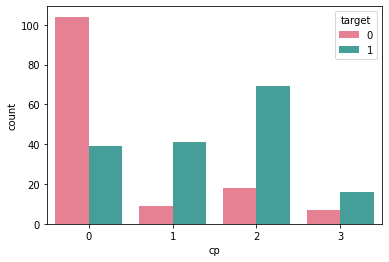

In [24]:
sns.countplot(x='cp',data=df,hue='target', palette='husl')

<AxesSubplot:xlabel='cp', ylabel='count'>

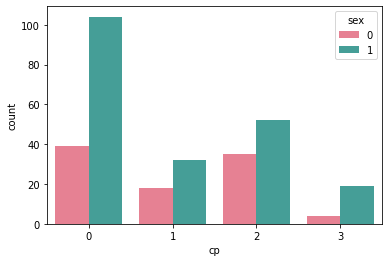

In [25]:
sns.countplot(x='cp',data=df,hue='sex', palette='husl')

<AxesSubplot:xlabel='sex', ylabel='chol'>

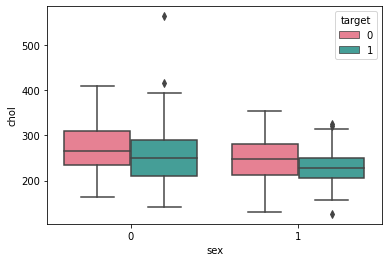

In [26]:
sns.boxplot(x='sex', y='chol', hue='target', palette='husl', data=df)

<AxesSubplot:xlabel='sex', ylabel='cp'>

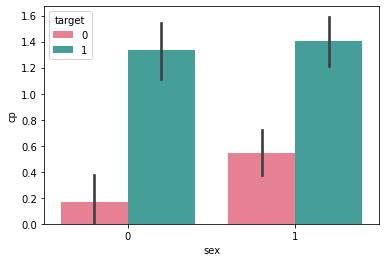

In [27]:
sns.barplot(x='sex', y='cp', hue='target', palette='husl', data=df)

<AxesSubplot:xlabel='sex', ylabel='thal'>

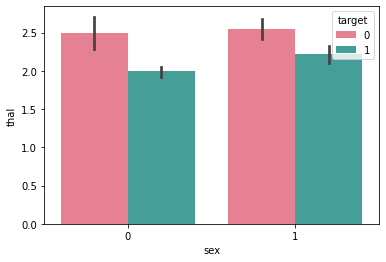

In [28]:
sns.barplot(x='sex', y='thal', hue='target', palette='husl', data=df)

<AxesSubplot:xlabel='sex', ylabel='ca'>

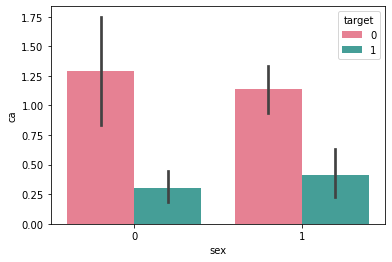

In [29]:
sns.barplot(x='sex', y='ca', hue='target', palette='husl', data=df)

<AxesSubplot:xlabel='sex', ylabel='oldpeak'>

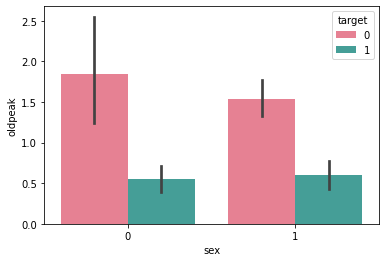

In [30]:
sns.barplot(x='sex', y='oldpeak', hue='target', palette='husl', data=df)

**ST depression induced by exercise relative to rest**

>fbs -> Fasting blood sugar >120mg/dl) (1-> True, 0-> False) and chest pain(cp) relation

In [31]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='fbs'>

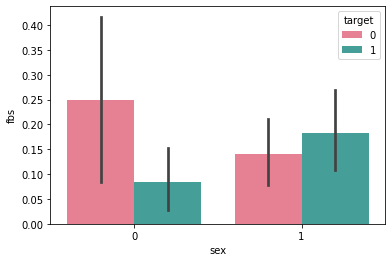

In [32]:
sns.barplot(data=df, x='sex', y='fbs',hue='target',palette='husl')

<AxesSubplot:xlabel='sex', ylabel='target'>

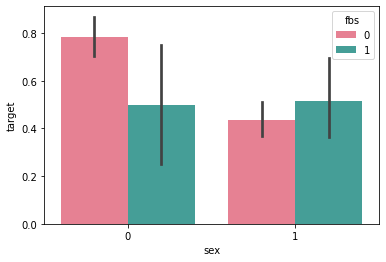

In [33]:
sns.barplot(data=df, x='sex', y='target',hue='fbs',palette='husl')

In [34]:
sex_target = pd.crosstab(df['sex'], df['target'])
sex_target

target,0,1
sex,,
0,24,72
1,114,93


<AxesSubplot:xlabel='sex'>

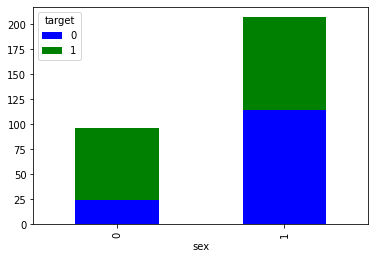

In [35]:
sex_target.plot(kind='bar', stacked=True,color=['Blue','Green'])

<AxesSubplot:xlabel='sex'>

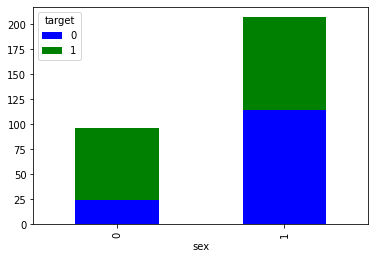

In [36]:
sex_target.plot(kind='bar', stacked=True,color=['Blue','Green'],grid=False)

In [37]:
sex_thal=pd.crosstab(index=df['sex'],columns=df['thal'],margins=True)
sex_thal

thal,0,1,2,3,All
sex,,,,,
0,1,1,79,15,96
1,1,17,87,102,207
All,2,18,166,117,303


<AxesSubplot:xlabel='sex'>

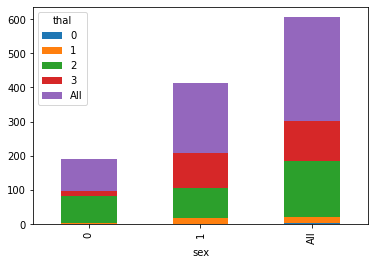

In [38]:
sex_thal.plot(kind='bar',stacked=True)

In [39]:
chest_pain=pd.crosstab(df['cp'],df['target'])
chest_pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<AxesSubplot:xlabel='cp'>

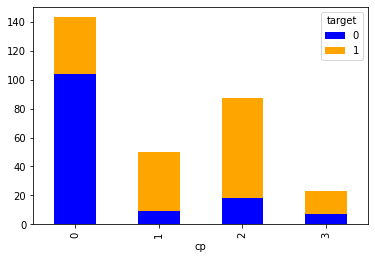

In [40]:
chest_pain.plot(kind='bar',stacked=True,color=['Blue','Orange'])

**Time to train the model**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

In [42]:
df_original=pd.read_csv('./dataset/heart-disease.csv')
df_original.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


> Scaling the dataset helps in better training of the model and the model performs better while making predictions.

In [43]:
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [45]:
X=df.drop('target', axis='columns')
y=df['target']

In [46]:
len(X), len(y)

(303, 303)

In [47]:
len(df)

303

In [48]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=69)

In [49]:
len(X_train),len(X_test)

(242, 61)

In [50]:
X_train.size

3146

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)


In [52]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[25,  4],
       [ 4, 28]])

<AxesSubplot:>

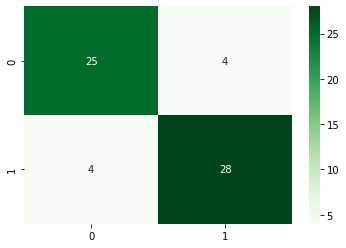

In [53]:
sns.heatmap(cm, annot=True,cmap='Greens')

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.8688524590163934

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [56]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)
cm2

array([[23,  6],
       [ 5, 27]])

In [57]:
accuracy_score(y_test,prediction2)

0.819672131147541

In [58]:
print(classification_report(y_test, prediction2))


              precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.82      0.84      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[25,  4],
       [ 4, 28]])

In [60]:
accuracy_score(y_test, prediction3)

0.8688524590163934

In [61]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [63]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
cm4

array([[24,  5],
       [ 3, 29]])

In [64]:
accuracy_score(y_test, prediction4)

0.8688524590163934

In [65]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5= confusion_matrix(y_test, prediction5)
cm5

array([[24,  5],
       [ 6, 26]])

In [66]:
accuracy_score(y_test, prediction5)

0.819672131147541

In [67]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
cm6= confusion_matrix(y_test, prediction5)
cm6

array([[24,  5],
       [ 6, 26]])

In [68]:
accuracy_score(y_test, prediction6)

0.8852459016393442

In [69]:
print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('NB: ', accuracy_score(y_test, prediction4))
print('SVC :', accuracy_score(y_test, prediction5))
print('KNN :', accuracy_score(y_test, prediction6))

lr : 0.8688524590163934
dtc : 0.819672131147541
rfc : 0.8688524590163934
NB:  0.8688524590163934
SVC : 0.819672131147541
KNN : 0.8852459016393442


**The best model is RandomForestClassifier(rfc) or KNeighborsClassifier(KNN)**
<br/>

**The worst model is DecisionTreeClassifier(DTC)**

**GridSearchCV**

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

KNN2 = KNeighborsClassifier()

In [96]:
parameters={'n_neighbors': [5,20,100,193],'weights':('uniform','distance',callable), 'algorithm':('auto','ball_tree','kd_tree','brute'), 'leaf_size': [20,30,50,100], 'p': [1,2], 'metric':('minkowski','euclidean'),'n_jobs':[-1]}

In [100]:
clf=GridSearchCV(KNN2,parameters,cv=100,error_score='raise', scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=100, error_score='raise', estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': [20, 30, 50, 100],
                         'metric': ('minkowski', 'euclidean'), 'n_jobs': [-1],
                         'n_neighbors': [5, 20, 100, 193], 'p': [1, 2],
                         'weights': ('uniform', 'distance',
                                     <built-in function callable>)},
             scoring='accuracy')

In [101]:
clf.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [102]:
clf.best_score_

0.8416666666666666

**HalvingGridSearchCV**

In [103]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [114]:
parameters_update={'weights':('uniform','distance',callable), 'algorithm':('auto','ball_tree','kd_tree','brute'), 'leaf_size': [20,30,50,100], 'p': [1,2], 'metric':('minkowski','euclidean'),'n_jobs':[-1]}

In [115]:
halving=HalvingGridSearchCV(KNN2, param_grid=parameters_update,cv=10)
halving.fit(X_train,y_train)

HalvingGridSearchCV(cv=10, estimator=KNeighborsClassifier(),
                    param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree',
                                              'brute'),
                                'leaf_size': [20, 30, 50, 100],
                                'metric': ('minkowski', 'euclidean'),
                                'n_jobs': [-1], 'p': [1, 2],
                                'weights': ('uniform', 'distance',
                                            <built-in function callable>)})

In [116]:
halving.best_params_

{'algorithm': 'brute',
 'leaf_size': 50,
 'metric': 'minkowski',
 'n_jobs': -1,
 'p': 1,
 'weights': 'uniform'}

In [117]:
halving.best_score_

0.8242424242424242

**Cross-Val-score**

In [119]:
from sklearn.model_selection import cross_val_score

In [122]:
scores=cross_val_score(KNN2,X,y,cv=100,scoring='accuracy')
scores

array([0.75      , 1.        , 0.75      , 0.66666667, 0.66666667,
       1.        , 1.        , 1.        , 1.        , 0.33333333,
       1.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 1.        , 0.66666667, 1.        , 1.        ,
       0.66666667, 0.33333333, 1.        , 1.        , 1.        ,
       0.66666667, 0.33333333, 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 0.66666667, 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.33333333, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 1.        , 0.66666667, 0.33333333, 1.        ,
       0.66666667, 0.66666667, 1.        , 1.        , 0.66666667,
       0.66666667, 1.        , 1.        , 1.        , 1.        ,
       0.33333333, 0.66666667, 0.66666667, 1.        , 1.        ,
       1.        , 0.66666667, 1.        , 1.        , 1.        ,
       1.        , 0.66666667, 1.        , 0.33333333, 0.66666

In [123]:
scores.mean()

0.8116666666666668

In [124]:
k_scores = []
k_range = range(1, 31)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=50, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7419047619047621, 0.7623809523809524, 0.7923809523809524, 0.7957142857142858, 0.8052380952380954, 0.801904761904762, 0.8080952380952382, 0.811904761904762, 0.8180952380952382, 0.794761904761905, 0.8114285714285714, 0.7980952380952382, 0.8080952380952381, 0.8047619047619048, 0.8080952380952382, 0.8180952380952382, 0.8214285714285715, 0.8180952380952382, 0.8147619047619048, 0.8080952380952382, 0.8047619047619048, 0.8014285714285717, 0.7980952380952382, 0.804761904761905, 0.8080952380952382, 0.8014285714285717, 0.8014285714285717, 0.7980952380952382, 0.7947619047619048, 0.7914285714285715]


Text(0, 0.5, 'Cross-Validated Accuracy')

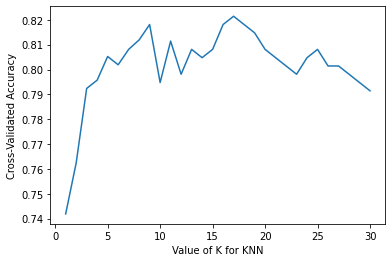

In [125]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')